In [1]:
# 1.3 - word count with text content from a corpus of documents
#
# code for the Intuitive Text Mining book
# Tariq Rashid, 2018

In [2]:
# import pandas for dataframe functions
import pandas

# collections includes counter
import collections

# word cloud and plotting
import matplotlib.pyplot as plt
import wordcloud

# glob module for finding files that match a pattern
import glob

In [3]:
# read corpus text

# start with empty text passage
my_text = ""

# corpus location and text filename pattern
corpus_directory = 'data_sets/recipes/'
text_filename_pattern = 'txt/??.txt'

# list of text files
list_of_text_files = glob.glob(corpus_directory + text_filename_pattern)

# read text from every text file
for text_file_name in list_of_text_files:
    print("reading from ...", text_file_name)
    with open(text_file_name, "r") as f:
        text_content = f.read()
        my_text += text_content
        pass
    pass


reading from ... data_sets/recipes/txt/15.txt
reading from ... data_sets/recipes/txt/01.txt
reading from ... data_sets/recipes/txt/00.txt
reading from ... data_sets/recipes/txt/14.txt
reading from ... data_sets/recipes/txt/02.txt
reading from ... data_sets/recipes/txt/16.txt
reading from ... data_sets/recipes/txt/17.txt
reading from ... data_sets/recipes/txt/03.txt
reading from ... data_sets/recipes/txt/07.txt
reading from ... data_sets/recipes/txt/13.txt
reading from ... data_sets/recipes/txt/12.txt
reading from ... data_sets/recipes/txt/06.txt
reading from ... data_sets/recipes/txt/10.txt
reading from ... data_sets/recipes/txt/04.txt
reading from ... data_sets/recipes/txt/05.txt
reading from ... data_sets/recipes/txt/11.txt
reading from ... data_sets/recipes/txt/08.txt
reading from ... data_sets/recipes/txt/20.txt
reading from ... data_sets/recipes/txt/21.txt
reading from ... data_sets/recipes/txt/09.txt
reading from ... data_sets/recipes/txt/19.txt
reading from ... data_sets/recipes

In [4]:
# read stopwords from file

# stopword list file
stop_words_file = 'stopwords/terrier-stop.txt'

with open(stop_words_file, "r") as f:
    stop_words = f.read().split()
    pass

print('number of stop words =', len(stop_words))

number of stop words = 733


In [5]:
# make lowercase
my_text = my_text.lower()

# keep only normal letters, spaces, and new lines, remove punctuation
cleaned_text = [char for char in my_text if char.isalpha() or char==" " or char=='\n']
cleaned_text = "".join(cleaned_text)

# split the text into words
word_list = cleaned_text.split()

# remove stop words
word_list = [w for w in word_list if w not in stop_words]

# remove words that are not of minimal length
min_word_length = 6
word_list = [w for w in word_list if len(w) >= min_word_length]

print("number of words =", len(word_list) )

# print(word_list)

number of words = 696


In [6]:
# count words

# dictionary of word counts
wordcount_dict = collections.Counter(word_list)

print("unique words =", len(wordcount_dict) )

unique words = 316


In [7]:
# pandas data frame

df = pandas.DataFrame.from_dict(wordcount_dict, orient="index", columns=['count'])

# add name to index
df.index.name = 'word'

# sort by count column, largest to smallest
df.sort_values('count', ascending=False, inplace=True)

# show top 10
df[:10]

,count
word,
little,27
butter,24
grated,17
cheese,17
pepper,14
tomato,13
boiled,12
tomatoes,10
pieces,10


(-0.5, 1199.5, 799.5, -0.5)

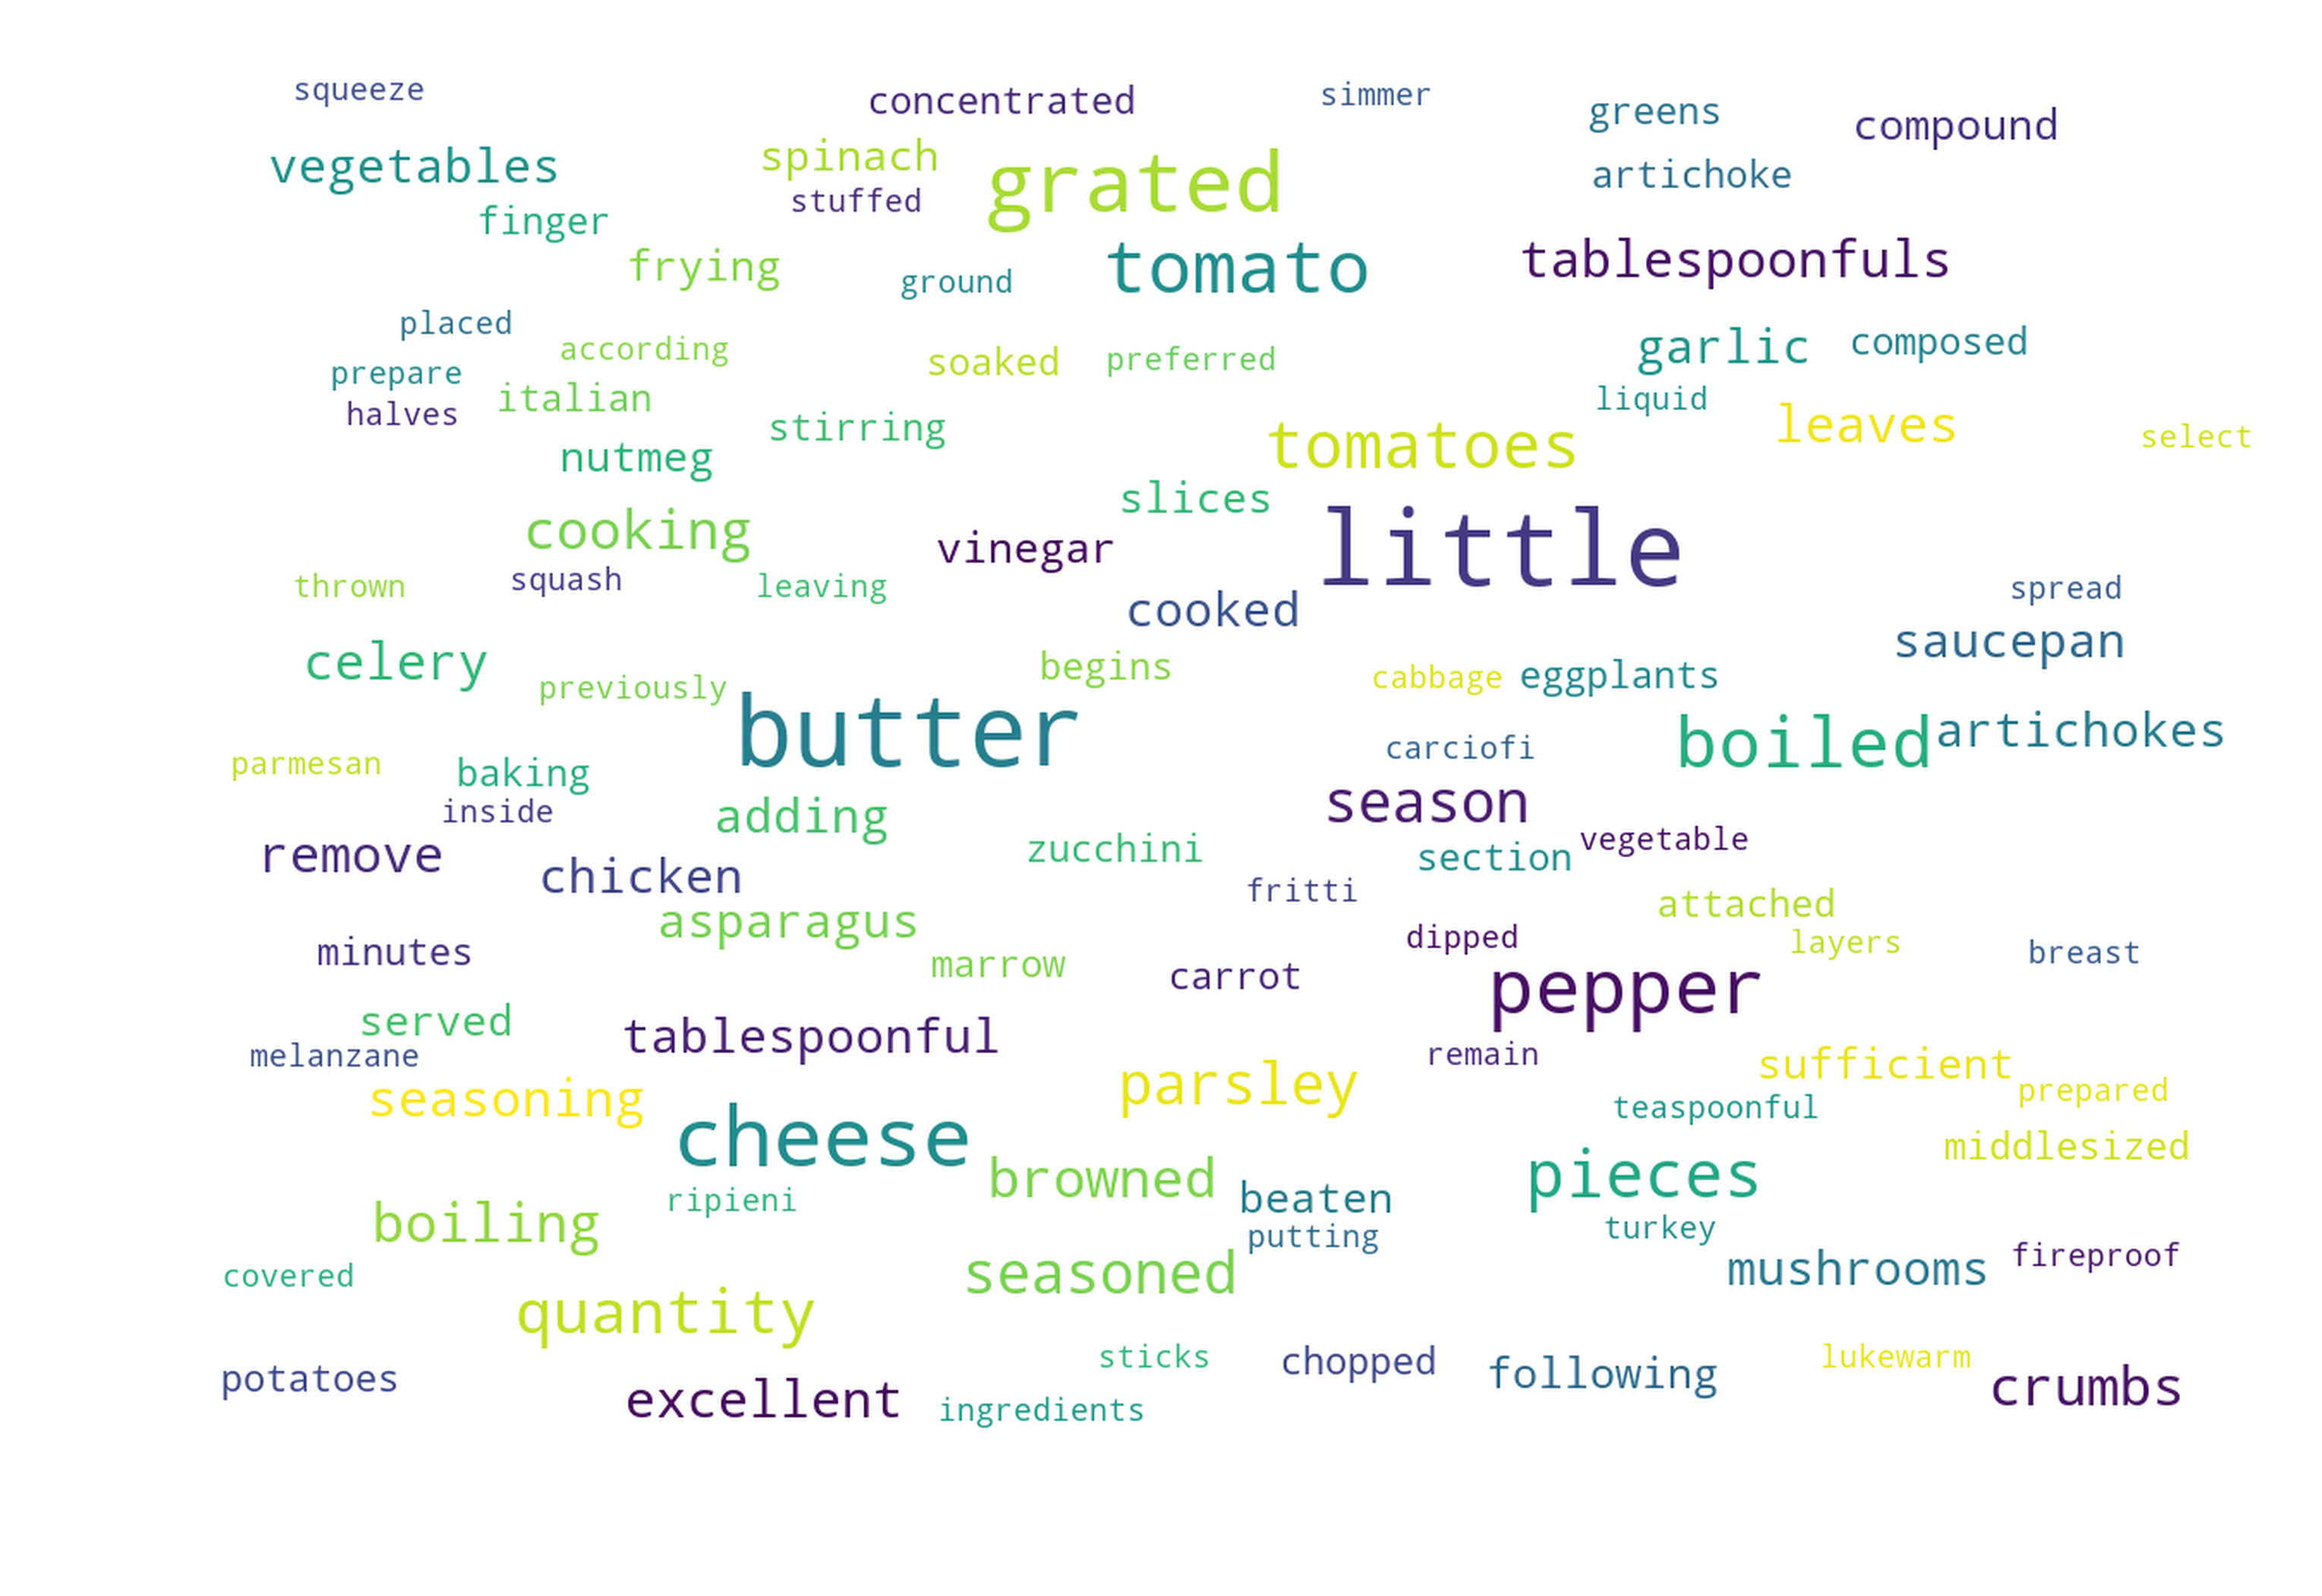

In [10]:
# word cloud

# wordcloud object
wc = wordcloud.WordCloud(colormap='viridis', max_font_size=60, max_words=100, width=1200, height=800, background_color="white", margin=10, prefer_horizontal=1.0)

# words and word count
wc.generate_from_frequencies(wordcount_dict)

# plot wordcloud
plt.figure(dpi=600, figsize=(6,4))
plt.imshow(wc, interpolation='lanczos')
plt.axis("off")